<a href="https://colab.research.google.com/github/LCaravaggio/politext/blob/main/Nuevas_Ideas_Politext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import ast

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Se lee la base original
base=pd.read_csv('/content/drive/MyDrive/par_esp_interventions.csv')

In [5]:
# Se conservan solamente las intervenciones de los partidos PSOE y PP
base=base[(base['party'] == 'PSOE') | (base['party'] == 'PP')]

Preprocesamiento

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
# Se incorporan las stopwords sugeridas por Federico
stopwords.extend(['señor', 'señora', 'mucha', 'gracia', 'año', 'pasado', 'cada', 'vez', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis' ,'siete', 'ocho', 'nueve', 'diez'])
stopwords.extend(['hoy', 'aquí', 'primer', 'lugar', 'primera', 'segunda', 'primero', 'segundo', 'siguiente', 'tercer'])
stopwords.extend(['convergencia', 'esquerra', 'republicana', 'grupo', 'parlamentaria', 'parlamentario', 'partido'])
stopwords.extend(['enmienda', 'votación', 'favor', 'abstención', 'ley', 'real', 'decreto', 'decretoley', 'resultado', 'voto', 'sé' ,'sí', 'silencio' ,'favor'])
stopwords.extend(['usted', 'señor', 'señora', 'señoría', 'presidente', 'presidenta', 'ministro', 'orden' , 'día', 'palabra', 'petición', 'posición', 'punto', 'vista', 'sesión', 'baldoví', 'duran', 'turno'])
stopwords.extend(['hacer', 'frente', 'puede' ,'ser', 'va', 'voy', 'decir'])

In [9]:
base['tokens']=""

In [22]:
for ind in base.index:
    #elimino puntuación
    non_punctuation = base['intervention'][ind].translate(str.maketrans('', '', string.punctuation))
    word_tokens = word_tokenize(non_punctuation)

    #elimino stopwords
    tokens=[w for w in word_tokens if not w.lower() in stopwords]

    #stemming
    porter_stemmer = PorterStemmer()
    stemmers = [porter_stemmer.stem(word) for word in tokens]
    base['tokens'][ind] = [stem for stem in stemmers if stem.isalpha() and len(stem) > 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# TFIDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tfidf=TfidfVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.99, min_df=0.001)

In [30]:
base['tokens']=base["tokens"].map(' '.join)

In [64]:
vecs = tfidf.fit_transform(base['tokens'])
feature_names = tfidf.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

In [65]:
df.shape

(73707, 200)

In [66]:
from wordcloud import WordCloud
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))

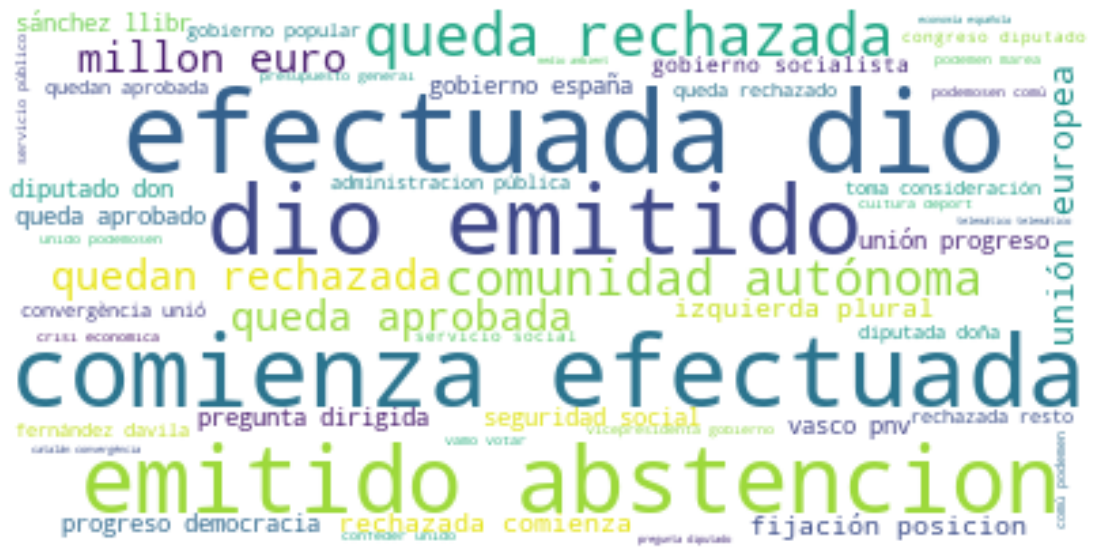

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# PP

In [76]:
pp=base[base['party'] == 'PP']

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.99, min_df=0.001)

In [84]:
vec = cv.fit(pp['tokens']) 

In [85]:
bag_of_words = vec.transform(pp['tokens'])

In [86]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [88]:
print(words_freq[:-40])

[('efectuada dio', 7708), ('comienza efectuada', 7336), ('dio emitido', 7298), ('millon euro', 6255), ('emitido abstencion', 5845), ('comunidad autónoma', 5472), ('unión europea', 2618), ('queda rechazada', 2610), ('quedan rechazada', 2095), ('administracion pública', 1897), ('izquierda plural', 1845), ('seguridad social', 1744), ('gobierno socialista', 1722), ('gobierno españa', 1692), ('gobierno popular', 1496), ('rechazada comienza', 1459), ('servicio público', 1360), ('servicio social', 1351), ('pregunta dirigida', 1346), ('creación empleo', 1303), ('presupuesto general', 1301), ('déficit público', 1292), ('crisi económica', 1280), ('queda aprobada', 1108), ('diputado don', 1106), ('economía española', 1067), ('unión progreso', 1033), ('progreso democracia', 1033), ('crecimiento económico', 1026), ('unido podemosen', 1001), ('podemen marea', 1000), ('confeder unido', 995), ('podemosen comú', 993), ('comú podemen', 992), ('fijación posicion', 943), ('convergència unió', 928), ('medi

# PSOE

In [89]:
psoe=base[base['party'] == 'PSOE']

In [90]:
cv=CountVectorizer(ngram_range=[2,2], max_features=200, stop_words=stopwords, max_df=0.99, min_df=0.001)

In [91]:
vec = cv.fit(psoe['tokens']) 

In [92]:
bag_of_words = vec.transform(psoe['tokens'])

In [93]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [94]:
print(words_freq[:-40])

[('millon euro', 5076), ('comunidad autónoma', 4822), ('unión europea', 3171), ('efectuada dio', 3057), ('dio emitido', 2990), ('comienza efectuada', 2973), ('emitido abstencion', 2405), ('gobierno españa', 1526), ('seguridad social', 1507), ('gobierno socialista', 1182), ('reforma labor', 1071), ('servicio público', 1013), ('política social', 1003), ('sistema financiero', 973), ('crisi económica', 915), ('gobierno popular', 912), ('presupuesto general', 878), ('economía española', 861), ('queda rechazada', 858), ('tribun constitucion', 841), ('queda aprobada', 813), ('violencia género', 769), ('quedan rechazada', 754), ('política económica', 740), ('per catalunya', 720), ('unidainiciativa per', 714), ('catalunya verd', 706), ('comisión europea', 704), ('republicanaizquierda unidainiciativa', 691), ('congreso diputado', 690), ('deuda pública', 666), ('administracion pública', 639), ('amnistía fiscal', 603), ('poder judici', 579), ('política fiscal', 553), ('consejo europeo', 549), ('gu